# CSUREMM 2025 Project
### Topic: Using Cryptocurrency Volatility to Predict Labor Participation Rate and Macroeconomic Change in US

#### Tianyi, Annie, Alice
#### Updated June 9, 2025
updated descriptive stats- Annie & Alice, generated new graphs- Tianyi

### 0.Background of study

fill in research later

### Methodology visualized:

citation: https://onlinelibrary.wiley.com/doi/full/10.1002/for.2930

# 0. Data Testing
## 0.1 Linear AutoRegression of Labor Participation on Tether, Bitcoin, USD (Monthly, 2017-9 to 2025-1)

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Load data
df = pd.read_excel('data/Monthly Mastersheet.xlsx')

# Ensure date is datetime and set index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

### Tether

In [6]:
# Create lagged log volatility as predictor
df['Lagged_LogVol'] = df['Tether'].shift(1)

# Drop NA (first row will be NaN due to lag)
df = df.iloc[1:]

X = df['Lagged_LogVol']
y = df['LFPR']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   LFPR   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     6.941
Date:                Mon, 09 Jun 2025   Prob (F-statistic):             0.0100
Time:                        14:27:25   Log-Likelihood:                -77.223
No. Observations:                  87   AIC:                             158.4
Df Residuals:                      85   BIC:                             163.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            63.1176      0.274    230.528

### Bitcoin

In [7]:
# Create lagged log volatility as predictor
df['Lagged_LogVol'] = df['Bitcoin'].shift(1)
# Drop NA (first row will be NaN due to lag)

df = df.iloc[1:]

X = df['Lagged_LogVol']
y = df['LFPR']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   LFPR   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7251
Date:                Mon, 09 Jun 2025   Prob (F-statistic):              0.397
Time:                        14:27:32   Log-Likelihood:                -79.731
No. Observations:                  86   AIC:                             163.5
Df Residuals:                      84   BIC:                             168.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            62.1640      0.300    207.411

/var/folders/91/zhth7_q95v1c0mrzzznv18_w0000gn/T/ipykernel_43075/1397215778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lagged_LogVol'] = df['Bitcoin'].shift(1)


## 0.2 Linear Regression of Inflation on VOL 
updated May 30th

### Tether

In [9]:
# Create lagged log volatility as predictor
df['Lagged_LogVol'] = df['Tether'].shift(1)

# Drop NA (first row will be NaN due to lag)
df = df.iloc[1:]

X = df['Lagged_LogVol']
y = df['CPI']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     86.16
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           1.97e-14
Time:                        14:27:55   Log-Likelihood:                -355.47
No. Observations:                  84   AIC:                             714.9
Df Residuals:                      82   BIC:                             719.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           205.4218      8.144     25.224

### Bitcoin

In [8]:
# Create lagged log volatility as predictor
df['Lagged_LogVol'] = df['Bitcoin'].shift(1)

# Drop NA (first row will be NaN due to lag)
df = df.iloc[1:]

X = df['Lagged_LogVol']
y = df['CPI']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     14.07
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           0.000325
Time:                        14:27:53   Log-Likelihood:                -383.87
No. Observations:                  85   AIC:                             771.7
Df Residuals:                      83   BIC:                             776.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           238.9598     10.872     21.979

# Plotting
updated June 9

### All Currency Variables

['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change', 'Lagged_LogVol']


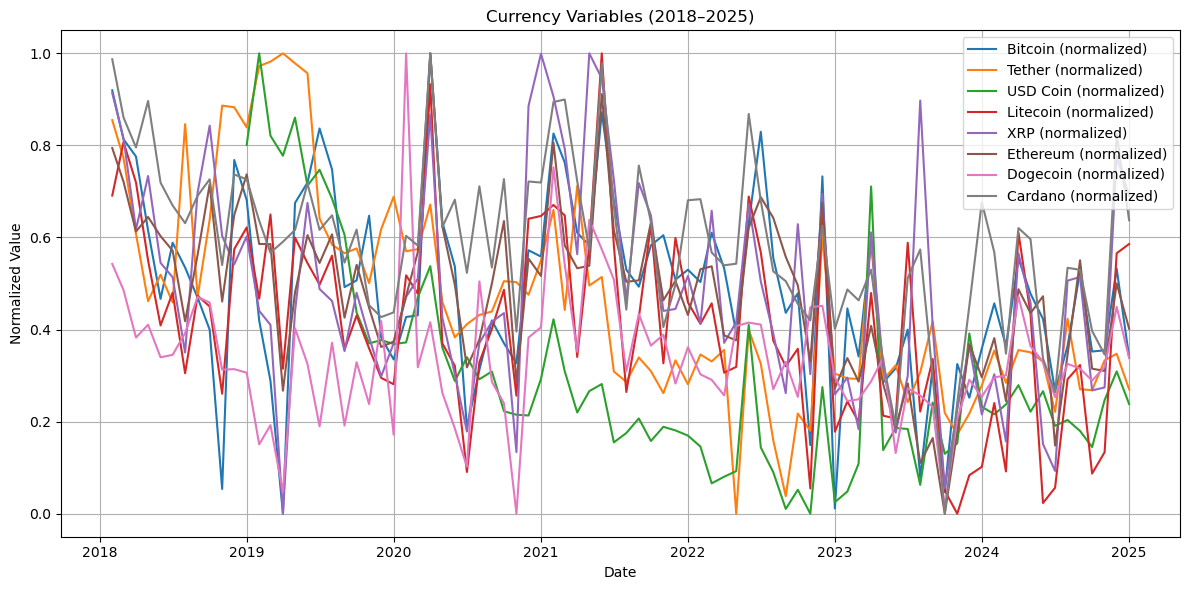

In [23]:
print(df.columns.tolist())

# Plot all four columns on the same graph
plt.figure(figsize=(12, 6))

# Normalize each series for comparison (optional but recommended)
df_normalized = df[['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot
plt.plot(df_normalized.index, df_normalized['Bitcoin'], label='Bitcoin (normalized)')
plt.plot(df_normalized.index, df_normalized['Tether'], label='Tether (normalized)')
plt.plot(df_normalized.index, df_normalized['USD Coin'], label='USD Coin (normalized)')
plt.plot(df_normalized.index, df_normalized['Litecoin'], label='Litecoin (normalized)')
plt.plot(df_normalized.index, df_normalized['XRP'], label='XRP (normalized)')
plt.plot(df_normalized.index, df_normalized['Ethereum'], label='Ethereum (normalized)')
plt.plot(df_normalized.index, df_normalized['Dogecoin'], label='Dogecoin (normalized)')
plt.plot(df_normalized.index, df_normalized['Cardano '], label='Cardano (normalized)')

plt.title('Currency Variables (2018–2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### All macros visual

['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change', 'Lagged_LogVol']


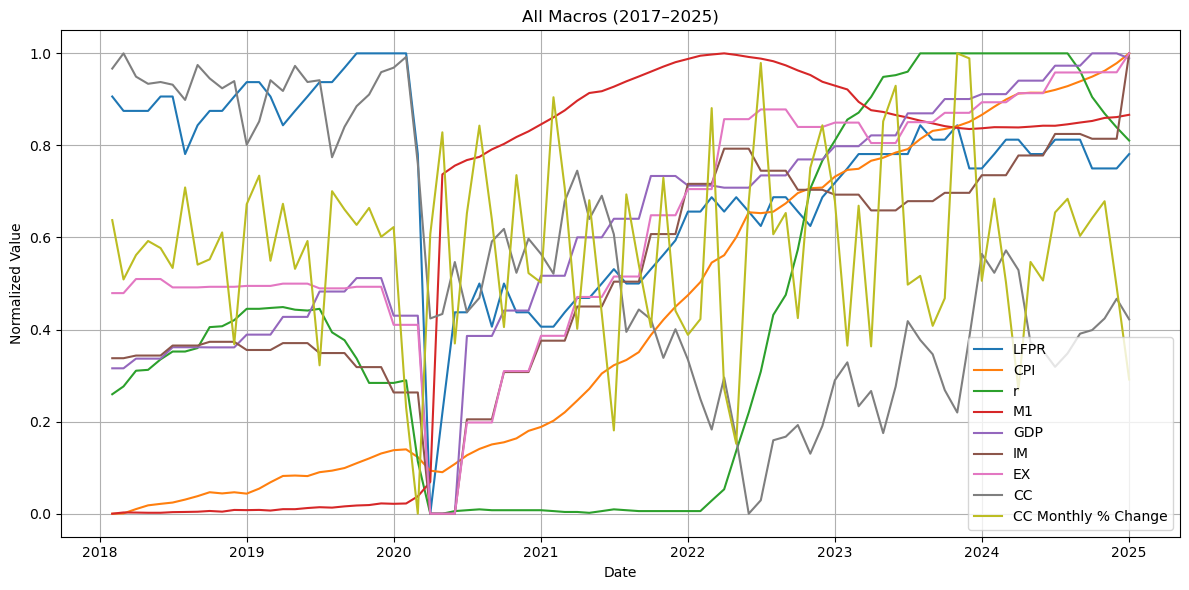

In [25]:
print(df.columns.tolist())

# Plot all four columns on the same graph
plt.figure(figsize=(12, 6))

# Normalize each series for comparison (optional but recommended)
df_normalized = df[['LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot
plt.plot(df_normalized.index, df_normalized['LFPR'], label='LFPR')
plt.plot(df_normalized.index, df_normalized['CPI'], label='CPI')
plt.plot(df_normalized.index, df_normalized['r'], label='r')
plt.plot(df_normalized.index, df_normalized['M1'], label='M1')
plt.plot(df_normalized.index, df_normalized['GDP'], label='GDP')
plt.plot(df_normalized.index, df_normalized['IM'], label='IM')
plt.plot(df_normalized.index, df_normalized['EX'], label='EX')
plt.plot(df_normalized.index, df_normalized['CC'], label='CC')
plt.plot(df_normalized.index, df_normalized['CC Monthly % Change'], label='CC Monthly % Change')

plt.title('All Macros (2017–2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Bitcoin & Tether

['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change', 'Lagged_LogVol']


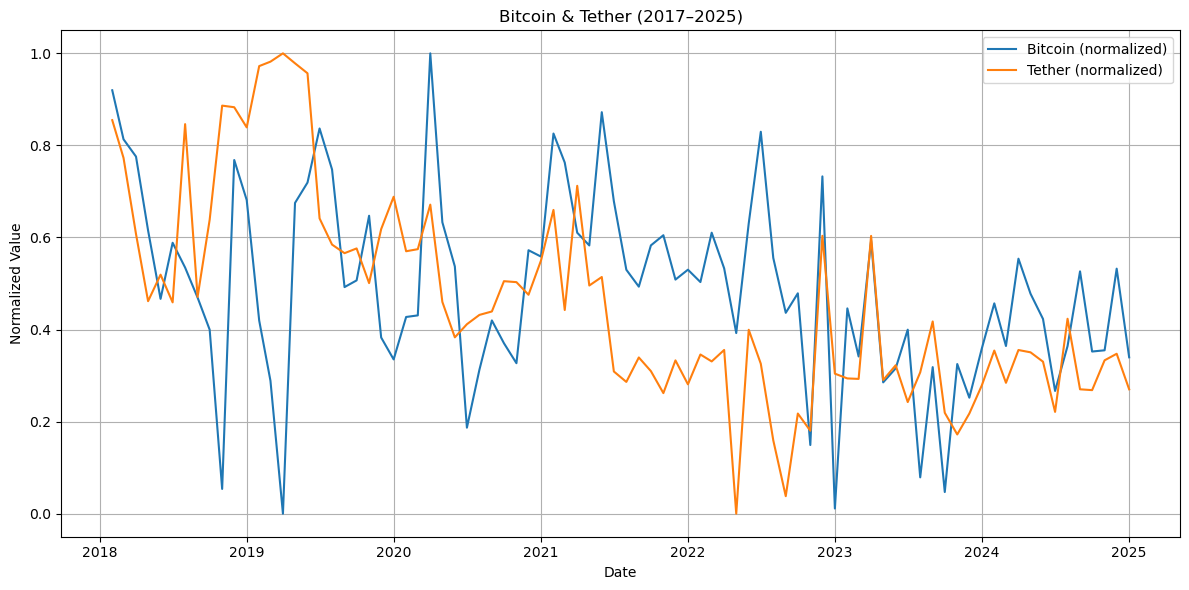

In [22]:
print(df.columns.tolist())

# Plot all four columns on the same graph
plt.figure(figsize=(12, 6))

# Normalize each series for comparison (optional but recommended)
df_normalized = df[['Bitcoin', 'Tether','VIX','MOVE']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot
plt.plot(df_normalized.index, df_normalized['Bitcoin'], label='Bitcoin (normalized)')
plt.plot(df_normalized.index, df_normalized['Tether'], label='Tether (normalized)')

plt.title('Bitcoin & Tether (2017–2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Labor data visual

['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change', 'Lagged_LogVol']


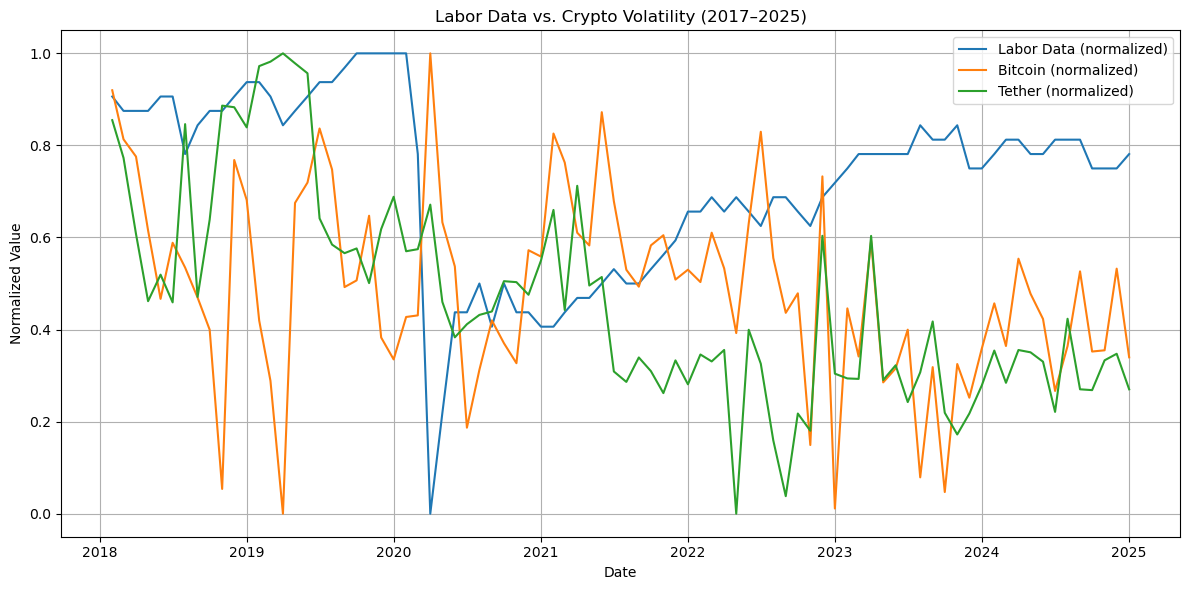

In [24]:
print(df.columns.tolist())

# Plot all four columns on the same graph
plt.figure(figsize=(12, 6))

# Normalize each series for comparison (optional but recommended)
df_normalized = df[['LFPR', 'Bitcoin', 'Tether']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)


# Plot
plt.plot(df_normalized.index, df_normalized['LFPR'], label='Labor Data (normalized)')
plt.plot(df_normalized.index, df_normalized['Bitcoin'], label='Bitcoin (normalized)')
plt.plot(df_normalized.index, df_normalized['Tether'], label='Tether (normalized)')

plt.title('Labor Data vs. Crypto Volatility (2017–2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Currency w VIX & MOVE Visual

['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change', 'Lagged_LogVol']


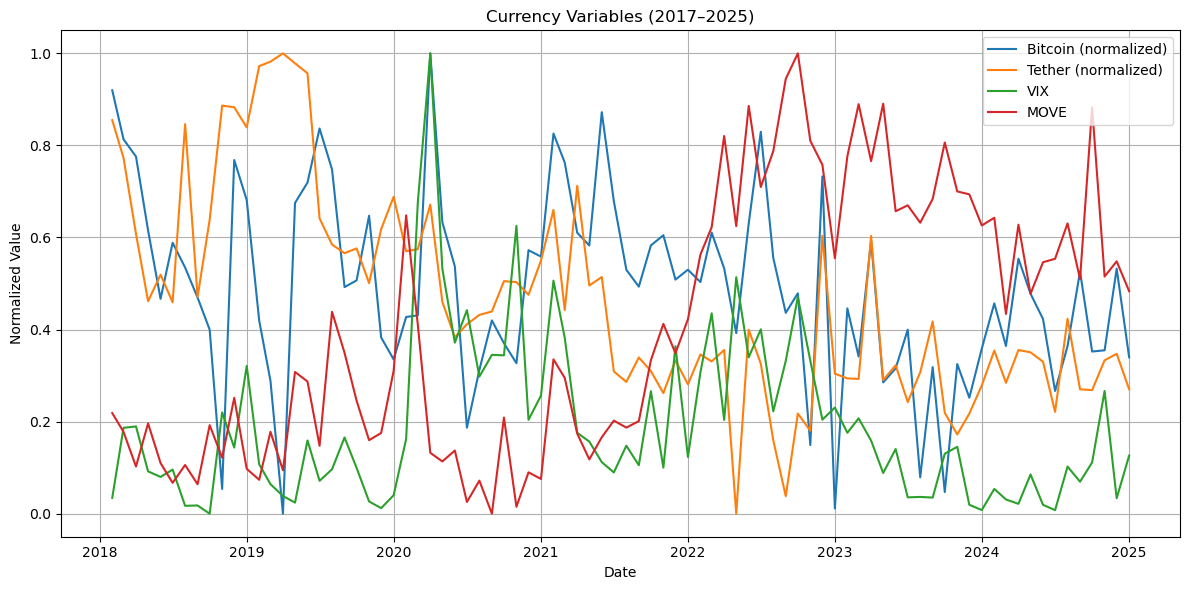

In [26]:
print(df.columns.tolist())

# Plot all four columns on the same graph
plt.figure(figsize=(12, 6))

# Normalize each series for comparison (optional but recommended)
df_normalized = df[['Bitcoin', 'Tether','VIX','MOVE']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot
plt.plot(df_normalized.index, df_normalized['Bitcoin'], label='Bitcoin (normalized)')
plt.plot(df_normalized.index, df_normalized['Tether'], label='Tether (normalized)')
plt.plot(df_normalized.index, df_normalized['VIX'], label='VIX')
plt.plot(df_normalized.index, df_normalized['MOVE'], label='MOVE')

plt.title('Currency Variables (2017–2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. Descriptive Statistics
need to change var names (repeated df if add code after this)

## Bitcoin, Tether, USD

In [ ]:
#Descrptive stats for Bitcoin, Tether, USD

#bitcoinrealvol
# Load the CSV file
from scipy.stats import skew, kurtosis
import pandas as pd
file_path = "data/bitcoinrealvol.csv"
df = pd.read_csv(file_path, header=None)

df.columns = ['Realized_Volatility']

# Remove any non-numeric values and convert to float
df = df[pd.to_numeric(df['Realized_Volatility'], errors='coerce').notnull()]
df['Realized_Volatility'] = df['Realized_Volatility'].astype(float)

# Calculate statistics
summary = {
    'Mean': df['Realized_Volatility'].mean(),
    'Median': df['Realized_Volatility'].median(),
    'Max': df['Realized_Volatility'].max(),
    'Min': df['Realized_Volatility'].min(),
    'Standard Deviation': df['Realized_Volatility'].std(),
    'Skewness': skew(df['Realized_Volatility']),
    'Kurtosis': kurtosis(df['Realized_Volatility'])
}

# Convert results to a DataFrame and print
summary_df = pd.DataFrame([summary])
print("Bitcoin Realized Volitility")
with pd.option_context('display.expand_frame_repr', False):
    print(summary_df)
    print("\n")

import pandas as pd
from scipy.stats import skew, kurtosis
#bitcoinlogvol
# Load the CSV file
file_path = "data/bitcoinlogvol.csv"
df = pd.read_csv(file_path, header=None)

df.columns = ['Realized_Volatility']

# Remove any non-numeric values and convert to float
df = df[pd.to_numeric(df['Realized_Volatility'], errors='coerce').notnull()]
df['Realized_Volatility'] = df['Realized_Volatility'].astype(float)

# Calculate statistics
summary = {
    'Mean': df['Realized_Volatility'].mean(),
    'Median': df['Realized_Volatility'].median(),
    'Max': df['Realized_Volatility'].max(),
    'Min': df['Realized_Volatility'].min(),
    'Standard Deviation': df['Realized_Volatility'].std(),
    'Skewness': skew(df['Realized_Volatility']),
    'Kurtosis': kurtosis(df['Realized_Volatility'])
}

# Convert results to a DataFrame and print
summary_df = pd.DataFrame([summary])
print("Bitcoin Log Volitility")
with pd.option_context('display.expand_frame_repr', False):
    print(summary_df)
    print("\n")

import pandas as pd
from scipy.stats import skew, kurtosis

#tetherrealvol
# Load the CSV file
file_path = "data/Tether - real.csv"
df = pd.read_csv(file_path, header=None)

df.columns = ['Realized_Volatility']

# Remove any non-numeric values and convert to float
df = df[pd.to_numeric(df['Realized_Volatility'], errors='coerce').notnull()]
df['Realized_Volatility'] = df['Realized_Volatility'].astype(float)

# Calculate statistics
summary = {
    'Mean': df['Realized_Volatility'].mean(),
    'Median': df['Realized_Volatility'].median(),
    'Max': df['Realized_Volatility'].max(),
    'Min': df['Realized_Volatility'].min(),
    'Standard Deviation': df['Realized_Volatility'].std(),
    'Skewness': skew(df['Realized_Volatility']),
    'Kurtosis': kurtosis(df['Realized_Volatility'])
}

# Convert results to a DataFrame and print
summary_df = pd.DataFrame([summary])
print("Tether Realized Volitility")
with pd.option_context('display.expand_frame_repr', False):
    print(summary_df)
    print("\n")

#tetherlogvol
# Load the CSV file
file_path = "data/Tether - log.csv"
df = pd.read_csv(file_path, header=None)

df.columns = ['Realized_Volatility']

# Remove any non-numeric values and convert to float
df = df[pd.to_numeric(df['Realized_Volatility'], errors='coerce').notnull()]
df['Realized_Volatility'] = df['Realized_Volatility'].astype(float)

# Calculate statistics
summary = {
    'Mean': df['Realized_Volatility'].mean(),
    'Median': df['Realized_Volatility'].median(),
    'Max': df['Realized_Volatility'].max(),
    'Min': df['Realized_Volatility'].min(),
    'Standard Deviation': df['Realized_Volatility'].std(),
    'Skewness': skew(df['Realized_Volatility']),
    'Kurtosis': kurtosis(df['Realized_Volatility'])
}

# Convert results to a DataFrame and print
summary_df = pd.DataFrame([summary])
print("Tether Log Volitility")
with pd.option_context('display.expand_frame_repr', False):
    print(summary_df)
    print("\n")

#USDrealvol
# Load the CSV file
file_path = "data/USD - real.csv"
df = pd.read_csv(file_path, header=None)

df.columns = ['Realized_Volatility']

# Remove any non-numeric values and convert to float
df = df[pd.to_numeric(df['Realized_Volatility'], errors='coerce').notnull()]
df['Realized_Volatility'] = df['Realized_Volatility'].astype(float)

# Calculate statistics
summary = {
    'Mean': df['Realized_Volatility'].mean(),
    'Median': df['Realized_Volatility'].median(),
    'Max': df['Realized_Volatility'].max(),
    'Min': df['Realized_Volatility'].min(),
    'Standard Deviation': df['Realized_Volatility'].std(),
    'Skewness': skew(df['Realized_Volatility']),
    'Kurtosis': kurtosis(df['Realized_Volatility'])
}
# Convert results to a DataFrame and print
summary_df = pd.DataFrame([summary])
print("USD Realized Volitility")
with pd.option_context('display.expand_frame_repr', False):
    print(summary_df)
    print("\n")

#USDlogvol
file_path = "data/USD - log.csv"
df = pd.read_csv(file_path, header=None)

df.columns = ['Realized_Volatility']

# Remove any non-numeric values and convert to float
df = df[pd.to_numeric(df['Realized_Volatility'], errors='coerce').notnull()]
df['Realized_Volatility'] = df['Realized_Volatility'].astype(float)

# Calculate statistics
summary = {
    'Mean': df['Realized_Volatility'].mean(),
    'Median': df['Realized_Volatility'].median(),
    'Max': df['Realized_Volatility'].max(),
    'Min': df['Realized_Volatility'].min(),
    'Standard Deviation': df['Realized_Volatility'].std(),
    'Skewness': skew(df['Realized_Volatility']),
    'Kurtosis': kurtosis(df['Realized_Volatility'])
}
# Convert results to a DataFrame and print
summary_df = pd.DataFrame([summary])
print("USD Log Volitility")
with pd.option_context('display.expand_frame_repr', False):
    print(summary_df)

Bitcoin Realized Volitility
       Mean    Median       Max       Min  Standard Deviation  Skewness  Kurtosis
0  0.036756  0.026261  0.204831  0.001694            0.031564  2.097337  5.757715


Bitcoin Log Volitility
       Mean  Median   Max   Min  Standard Deviation  Skewness  Kurtosis
0 -1.813229   -1.82 -0.79 -3.19            0.419135 -0.334903  0.270325


Tether Realized Volitility
       Mean    Median       Max       Min  Standard Deviation  Skewness   Kurtosis
0  0.000987  0.000412  0.011461  0.000076            0.001666  3.592852  14.362637


Tether Log Volitility
       Mean  Median   Max   Min  Standard Deviation  Skewness  Kurtosis
0 -3.784958    -3.9 -2.23 -4.74            0.491597   1.08904  0.874666


USD Realized Volitility
       Mean    Median      Max       Min  Standard Deviation  Skewness  Kurtosis
0  0.000415  0.000341  0.00206  0.000059            0.000304  2.479719  7.721799


USD Log Volitility
       Mean  Median   Max   Min  Standard Deviation  Skewness  Kurt